## 영화 관객수 예측 튜토리얼 대회

일정	①	답안 제출 : 2019. 4. 30 10:00 ~ 2019. 5. 19 24:00
②	평가 : 2019. 5. 20 00:00 ~ 2019. 5. 30 24:00
③	시상 : 2019. 5. 31 00:00 ~ 2019. 6. 11 24:00 

과제: 영화 관객수를 예측하세요. 

평가산식	RMSE 
데이터 설명	[Files]
①	movies_train.csv
2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터
②	movies_test.csv
관객수를 제외하고 movies_train과 동일
③	submission.csv
제출 파일의 형식


[Data fields]
①	movies_train.csv
2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터 

Column_name	Description
1 title : 영화의 제목
2 distributor : 배급사
3 genre : 장르
4 release_time : 개봉일
5 time : 상영시간(분)
6 screening_rat : 상영등급
7 director : 감독이름
8 dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
9 dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
10 num_staff : 스텝수
11 num_actor : 주연배우수
12	box_off_num : 관객수


③	submission.csv
제출 파일의 형식 

ref:
https://myjamong.tistory.com/79
https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-6-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%AC%EC%9D%98-%EC%95%99%EC%83%81%EB%B8%94/#5

https://programmers.co.kr/learn/courses/21/lessons/944
https://github.com/hyeonho1028/BigContest/blob/master/python/env.ipynb
https://partrita.github.io/posts/random-forest-python/
https://nonmeyet.tistory.com/m/33

https://m.blog.naver.com/PostView.nhn?blogId=ssdyka&logNo=221246884366&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# read data
mtrain = pd.read_csv('../input/movies_train.csv')
mtest = pd.read_csv('../input/movies_test.csv')

In [2]:
# preprocessing

a = list()
for i in mtrain.index:
    a.append(mtrain['release_time'][i][5:7])
    
    
for i, j in enumerate(a):
    a[i] = int(j)


for i, j in enumerate(a):
    if 0 < j < 4:
        a[i] = 1
    elif 3 < j < 7:
        a[i] = 2
    elif 6 < j < 10:
        a[i] = 3
    else:
        a[i] = 4
mtrain['season'] = a
mtrain = mtrain.drop('release_time', axis = 1)
mtrain.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,season
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,4
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2
3,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.00,2,20,6,217866,3
4,불량남녀,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,신근호,1.00,1,251,2,483387,4


In [3]:
mtrain.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,season
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,4
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,4
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2
3,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.00,2,20,6,217866,3
4,불량남녀,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,신근호,1.00,1,251,2,483387,4


[Data fields]
①	movies_train.csv
2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터 

Column_name	Description
1 title : 영화의 제목
2 distributor : 배급사
3 genre : 장르
4 release_time : 개봉일
5 time : 상영시간(분)
6 screening_rat : 상영등급
7 director : 감독이름
8 dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
9 dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
10 num_staff : 스텝수
11 num_actor : 주연배우수
12	box_off_num : 관객수

important index
genre, screening_rat, season(release_time)

In [4]:

mtrain[pd.get_dummies(mtrain['genre']).columns] =  pd.get_dummies(mtrain['genre'])
mtrain[pd.get_dummies(mtrain['screening_rat']).columns] =  pd.get_dummies(mtrain['screening_rat'])
mtrain[pd.get_dummies(mtrain['season']).columns] =  pd.get_dummies(mtrain['season'])

In [5]:
mtrain.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,...,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가,1,2,3,4
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,NaN,0,91,2,...,1,0,0,0,0,1,0,0,0,1
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,...,0,0,0,0,0,1,0,0,0,1
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,...,1,0,0,1,0,0,0,1,0,0
3,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.00,2,20,6,...,0,1,0,0,1,0,0,0,1,0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,신근호,1.00,1,251,2,...,0,1,0,1,0,0,0,0,0,1


In [6]:
mtrain = mtrain[mtrain['box_off_num']>=10000] # 관객수 10,000 이상인 건만 학습에 사용

In [7]:
mtrain['box_off_num'] = np.round(mtrain['box_off_num']/10000) # scaling # 그래프 표시 용이를 위해 스케일 다운

In [8]:
mtrain.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,...,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가,1,2,3,4
0,개들의 전쟁,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,NaN,0,91,2,...,1,0,0,0,0,1,0,0,0,1
1,내부자들,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,...,0,0,0,0,0,1,0,0,0,1
2,은밀하게 위대하게,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,...,1,0,0,1,0,0,0,1,0,0
3,나는 공무원이다,(주)NEW,코미디,101,전체 관람가,구자홍,23894.00,2,20,6,...,0,1,0,0,1,0,0,0,1,0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,신근호,1.00,1,251,2,...,0,1,0,1,0,0,0,0,0,1


In [9]:
mtrain.shape

(312, 32)

In [10]:
mtrain.columns

Index([         'title',    'distributor',          'genre',           'time',
        'screening_rat',       'director', 'dir_prev_bfnum',   'dir_prev_num',
            'num_staff',      'num_actor',    'box_off_num',         'season',
                   'SF',             '공포',            '느와르',          '다큐멘터리',
                  '드라마',         '멜로/로맨스',            '뮤지컬',           '미스터리',
                 '서스펜스',          '애니메이션',             '액션',            '코미디',
              '12세 관람가',        '15세 관람가',         '전체 관람가',       '청소년 관람불가',
                      1,                2,                3,                4],
      dtype='object')

In [11]:
xtrain = mtrain.drop([  'title',  'distributor',          'genre',           'time',  'screening_rat',
             'director', 'dir_prev_bfnum',   'dir_prev_num',    'num_actor',   'season'], axis=1)

In [12]:
# 학습과 테스트 데이터 분리 - 모델 예측도 확인용

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain.drop(['box_off_num'], axis = 1), xtrain['box_off_num'], test_size=0.2, random_state=3)

In [13]:
X_train.shape

(249, 21)

In [14]:
X_test.shape

(63, 21)

In [15]:
X_train.head()

,num_staff,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,...,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가,1,2,3,4
360,566,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
226,318,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,251,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
326,369,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
591,59,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [16]:
X_test.head()

,num_staff,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,...,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가,1,2,3,4
378,277,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
475,261,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
408,264,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
465,200,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
183,307,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## 일반회귀 모델

In [17]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model = model.fit(X_train, y_train)
y_new = model.predict(X_test)
import math
math.sqrt(np.mean((y_test-y_new)**2))

141.23848287116869

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


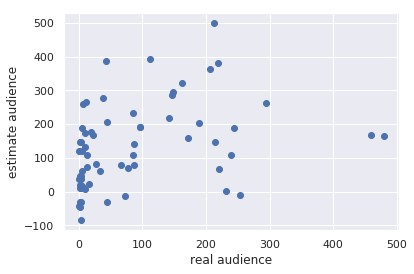

In [19]:
plt.scatter(y_test, y_new)
plt.xlabel('real audience')
plt.ylabel('estimate audience')
plt.show()

## 랜덤포레스트 모델

In [20]:
from sklearn.ensemble import RandomForestRegressor
# 학습 진행
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

# 예측
y_new_r = forest.predict(X_test)
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 0.869
테스트 세트 정확도: -0.624


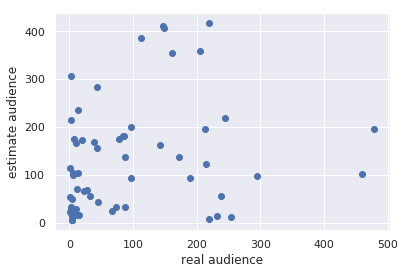

In [21]:
plt.scatter(y_test, y_new_r)
plt.xlabel('real audience')
plt.ylabel('estimate audience')
plt.show()

## 랜덤포레스트 모델 및 검증

In [22]:
# https://programmers.co.kr/learn/courses/21/lessons/944
model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)

    # 평균을 낸다.
    mean_difference = difference.mean()

    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)

    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer


make_scorer(rmsle)

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [25]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))


CPU times: user 1.76 s, sys: 11.8 ms, total: 1.77 s
Wall time: 1.77 s
Score= 1.77687


In [26]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
# 예측
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]


(63,)


array([136.94      , 103.97      , 155.3       ,  68.56      ,
       181.86666667,  13.02      ,  28.49      ,  55.18      ,
       307.3       ,  54.25      ])

/home/hygjob/testbed/datascience/ve/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5, 1.0, 'test')]

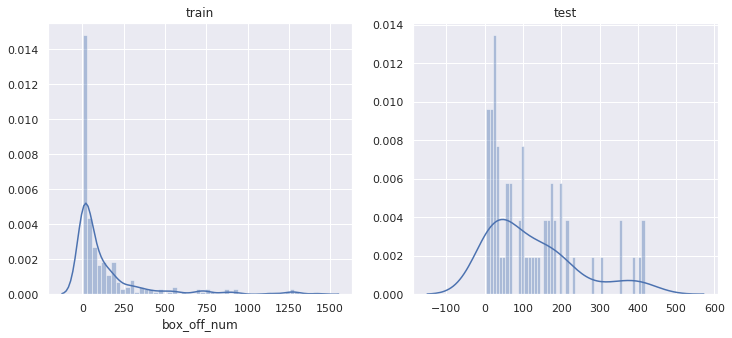

In [28]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")


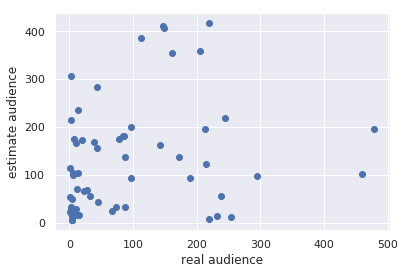

In [29]:
plt.scatter(y_test, predictions)
plt.xlabel('real audience')
plt.ylabel('estimate audience')
plt.show()

## submit

실제과제 데이터로 예측하기

In [30]:
mtest.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [31]:
## preprocessing
R_test = mtest.copy()
a = list()
for i in R_test.index:
    a.append(R_test['release_time'][i][5:7])
    
    
for i, j in enumerate(a):
    a[i] = int(j)


for i, j in enumerate(a):
    if 0 < j < 4:
        a[i] = 1
    elif 3 < j < 7:
        a[i] = 2
    elif 6 < j < 10:
        a[i] = 3
    else:
        a[i] = 4
R_test['season'] = a
R_test = R_test.drop('release_time', axis = 1)
R_test.head()



R_test[pd.get_dummies(R_test['genre']).columns] =  pd.get_dummies(R_test['genre'])
R_test[pd.get_dummies(R_test['screening_rat']).columns] =  pd.get_dummies(R_test['screening_rat'])
R_test[pd.get_dummies(R_test['season']).columns] =  pd.get_dummies(R_test['season'])


R_test = R_test.drop([  'title',  'distributor',          'genre',           'time',  'screening_rat',
             'director', 'dir_prev_bfnum',   'dir_prev_num',    'num_actor',   'season'], axis=1)
			 



In [32]:
# 모델화

# 예측
real_test_predictions = model.predict(R_test)

print(real_test_predictions.shape)
real_test_predictions[0:10]



(243,)


array([373.21      , 213.24      , 118.63      , 360.97      ,
        97.45      ,  95.82      ,   9.54333333,  68.07      ,
        16.16      ,  20.36      ])

In [33]:
submission = pd.read_csv("../input/submission.csv")
submission

submission["box_off_num"] = np.round(real_test_predictions * 10000) # 처음에 스케일 다운한 것을 다시 원래대로 바꾸어 준다. 

print(submission.shape)
submission.head()


(243, 2)


,title,box_off_num
0,용서는 없다,3732100.0
1,아빠가 여자를 좋아해,2132400.0
2,하모니,1186300.0
3,의형제,3609700.0
4,평행 이론,974500.0


In [34]:
submission.to_csv("submission.csv".format(score), index=False)
